# IBS-NJ trees using R

This is an attempt to create a NJ tree relying on IBS on a subset of smarter samples. Execute this plink command to get the IBS matrix:

```bash
plink --chr-set 26 no-xy no-mt --allow-no-sex --keep SMARTER-OA-OAR3-top-0.4.10/5_breeds-0-50K.csv \
    --bfile SMARTER-OA-OAR3-top-0.4.10/SMARTER-OA-OAR3-top-0.4.10 \
    --geno 0.1 --distance square gz ibs --out SMARTER-OA-OAR3-top-0.4.10/5_breeds-0-50K
```

In [1]:
require(ape)
require(here)

Loading required package: ape

Loading required package: here

here() starts at /home/paolo/Projects/SMARTER-database



Load the IBS matrix and convert it to a distance matrix:

In [2]:
# Loading the PLINK IBS matrix
ibs_matrix <- as.matrix(read.table(
    here("data/interim", "SMARTER-OA-OAR3-top-0.4.10/5_breeds-0-50K.mibs.gz")))
sample_names <- read.table(
    here("data/interim", "SMARTER-OA-OAR3-top-0.4.10/5_breeds-0-50K.mibs.gz"))
rownames(ibs_matrix) <- sample_names$V2
colnames(ibs_matrix) <- sample_names$V2

# Transforming the IBS matrix into a distance matrix
dist_matrix <- as.dist(1 - ibs_matrix)

Try to define NJ trees using R

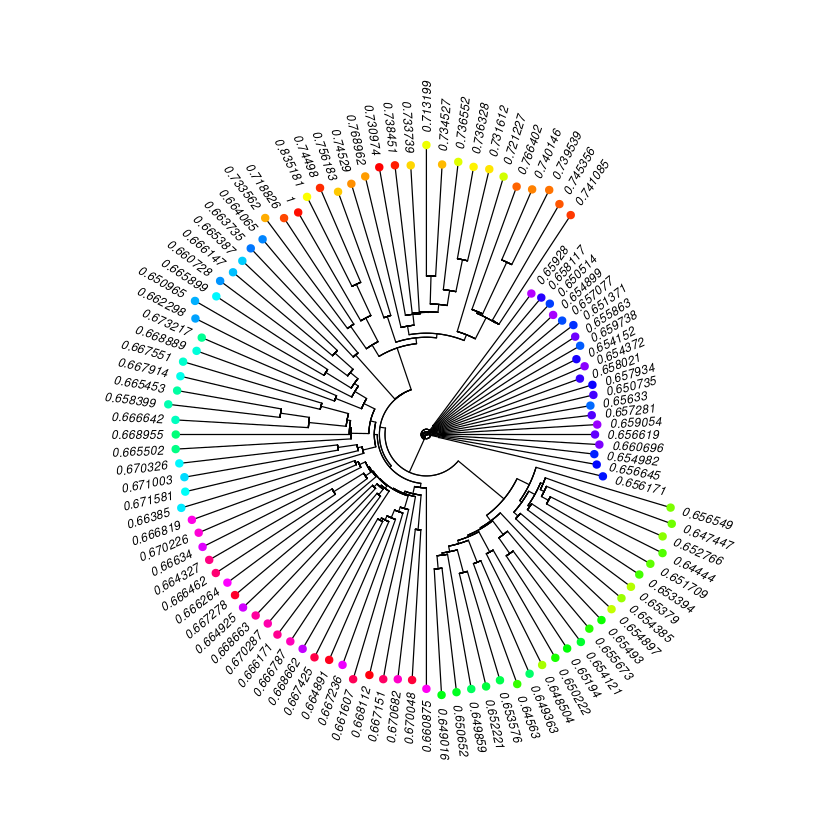

In [3]:
# Calculate the Neighbor-Joining tree
nj_tree <- nj(dist_matrix)

# Create a color palette based on the breed of each sample
unique_breeds <- unique(sample_names$V1)  # Ottieni i nomi unici delle razze
breed_colors <- rainbow(length(unique_breeds))  # Genera una palette di colori

# assign a color to each sample based on its breed
sample_colors <- breed_colors[match(sample_names$V1, unique_breeds)]

# Visualize the tree
par(mar = c(4, 4, 4, 4), xpd=TRUE)  # Imposta margini più ampi se necessario
plot(nj_tree, type = "fan", cex = 0.6, label.offset = 0.01)  # Visualizza l'albero in formato circolare
tiplabels(pch = 19, col = sample_colors, cex = 0.8)  # Colora i campioni con punti

Render the tree as a png image:

In [4]:
png("5_breeds-0-50K.png", width = 3000, height = 3000, res = 300)
par(mar = c(4, 4, 4, 4), xpd=TRUE)  # Imposta margini più ampi se necessario
plot(nj_tree, type = "fan", cex = 0.6, label.offset = 0.01)  # Visualizza l'albero in formato circolare
tiplabels(pch = 19, col = sample_colors, cex = 0.8)  # Colora i campioni con punti
dev.off()

png 
  2